In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

In [2]:
## Read data

print ("Reading images...")
vehicle_images = glob.glob('./vehicles/*/*.png')
non_vehicle_images = glob.glob('./non-vehicles/*/*.png')

vehicle_images_arr = []
non_vehicle_images_arr = []


for img_path in vehicle_images:
    img = cv2.imread(img_path)
    vehicle_images_arr.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
for img_path in non_vehicle_images:
    img = cv2.imread(img_path)
    non_vehicle_images_arr.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
print("...done!")

print("Vehicle Images: " + str(len(vehicle_images_arr)))
print("Non-Vehicle Images: " + str(len(non_vehicle_images_arr)))


Reading images...
...done!
Vehicle Images: 8792
Non-Vehicle Images: 8968


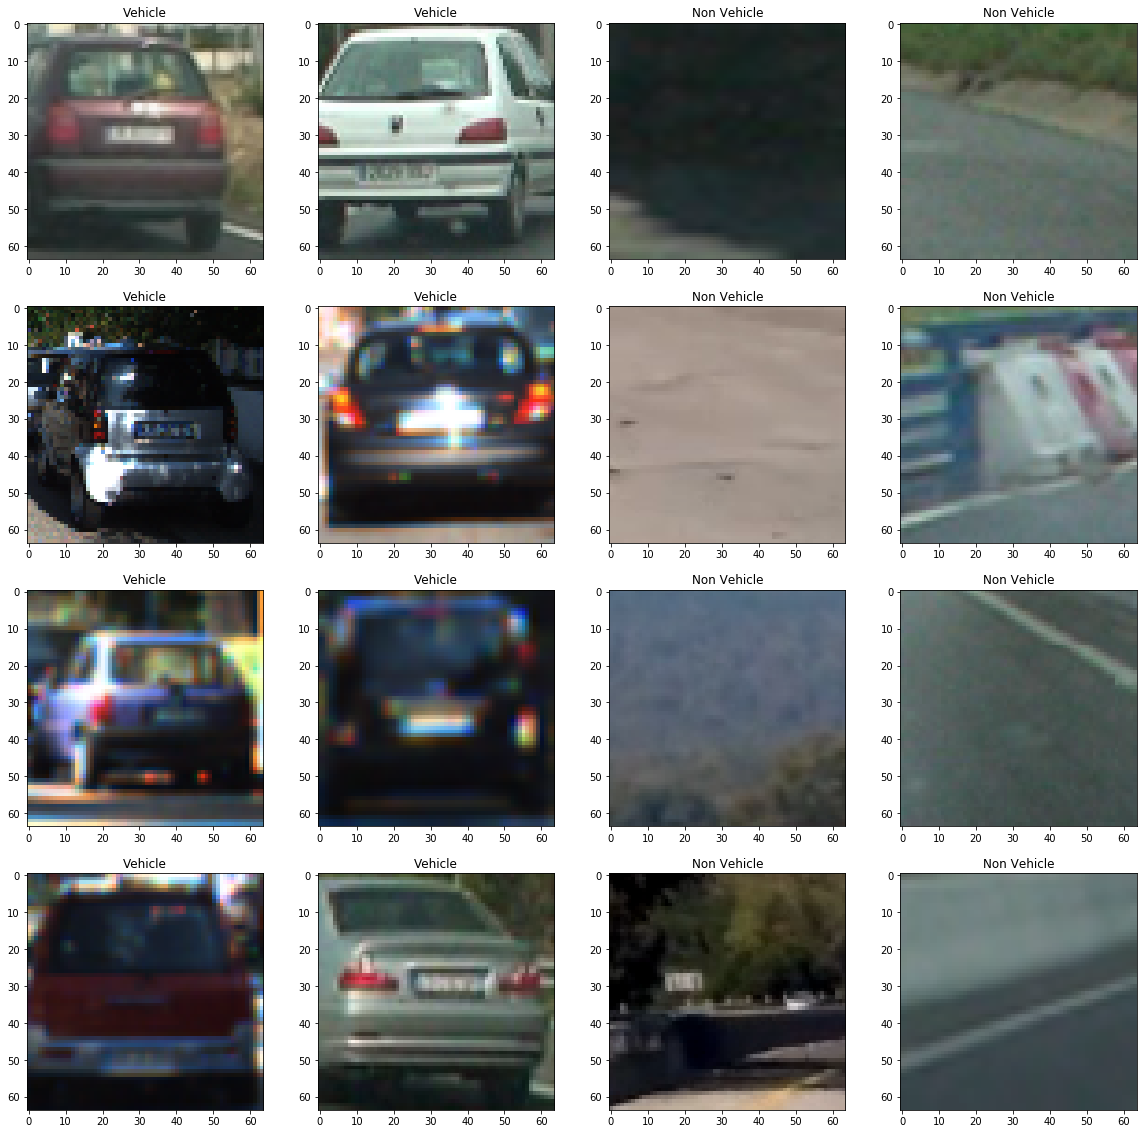

In [3]:
## Let's visualize some of the images

f, axes = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    vehicle1 = random.randint(0, len(vehicle_images_arr) - 1)
    vehicle2 = random.randint(0, len(vehicle_images_arr) - 1)

    non_vehicle1 = random.randint(0, len(non_vehicle_images_arr) - 1)
    non_vehicle2 = random.randint(0, len(non_vehicle_images_arr) - 1)

    axes[i,0].set_title("Vehicle")
    axes[i,0].imshow(vehicle_images_arr[vehicle1])
    
    axes[i,1].set_title("Vehicle")
    axes[i,1].imshow(vehicle_images_arr[vehicle2])
    
    axes[i,2].set_title("Non Vehicle")
    axes[i,2].imshow(non_vehicle_images_arr[non_vehicle1])
    
    axes[i,3].set_title("Non Vehicle")
    axes[i,3].imshow(non_vehicle_images_arr[non_vehicle2])
    

In [4]:
## Features

# Color Spaces
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    channel_0 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel_1 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel_2 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = channel_0[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel_0[0], channel_1[0], channel_2[0]))
    # Return the individual histograms, bin_centers and feature vector
    return channel_0, channel_1, channel_2, bin_centers, hist_features

HLS Colorspace
RGB Colorspace
YUV Colorspace


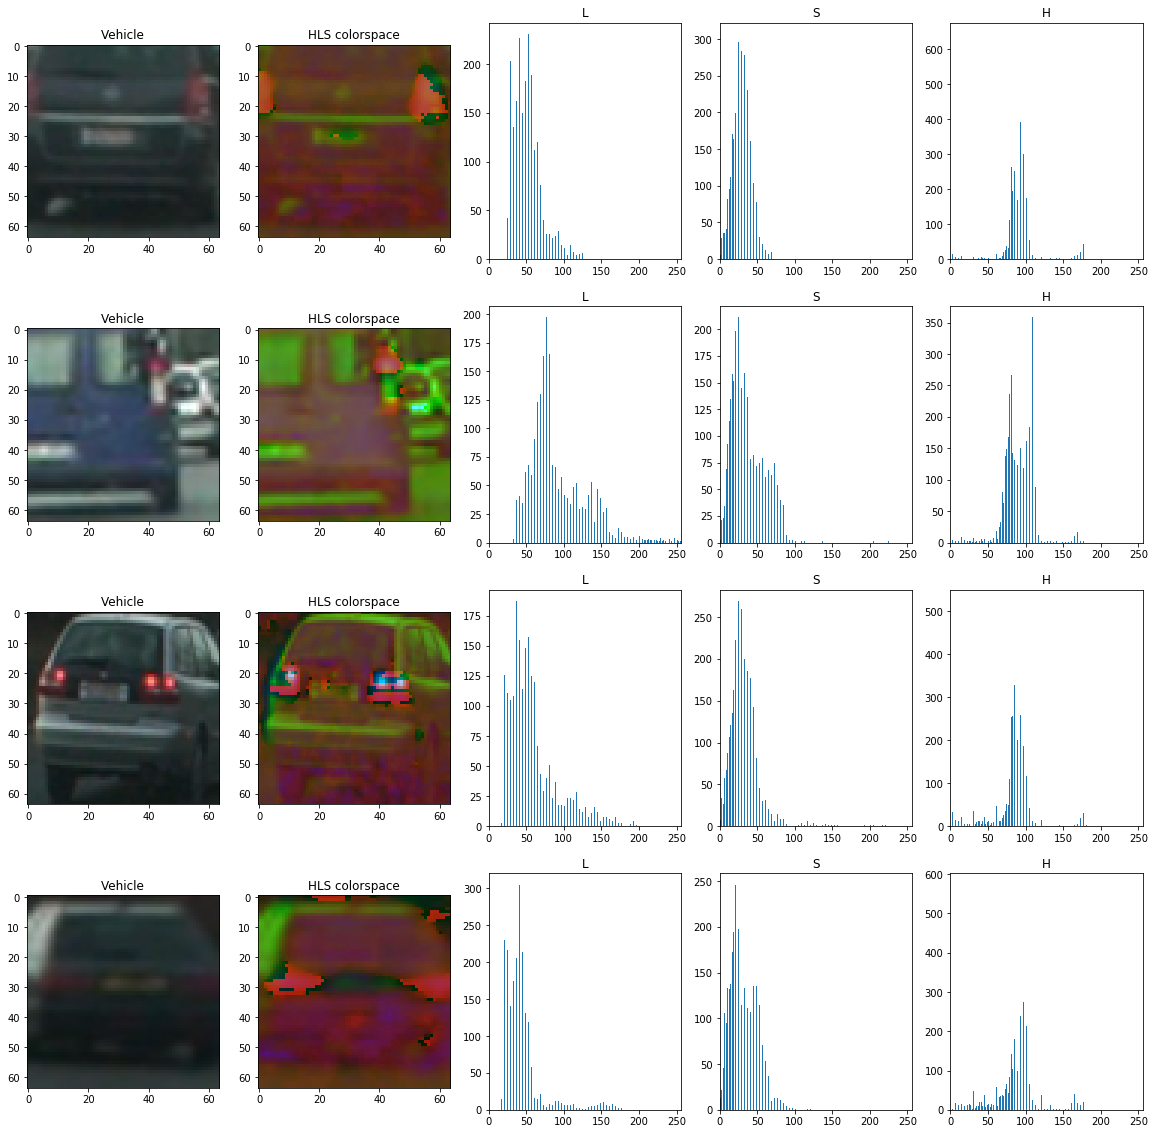

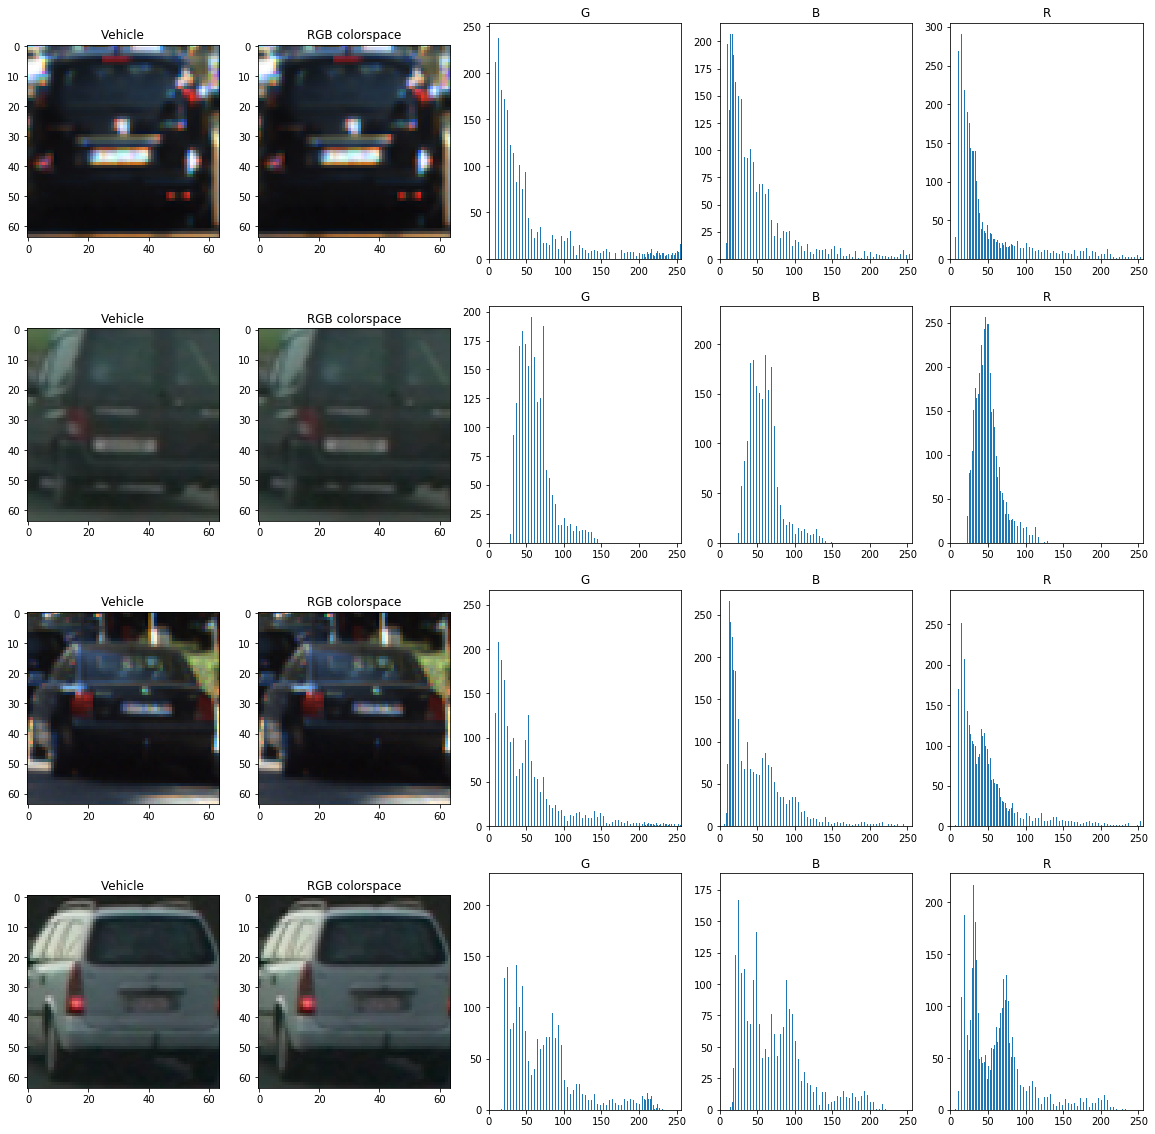

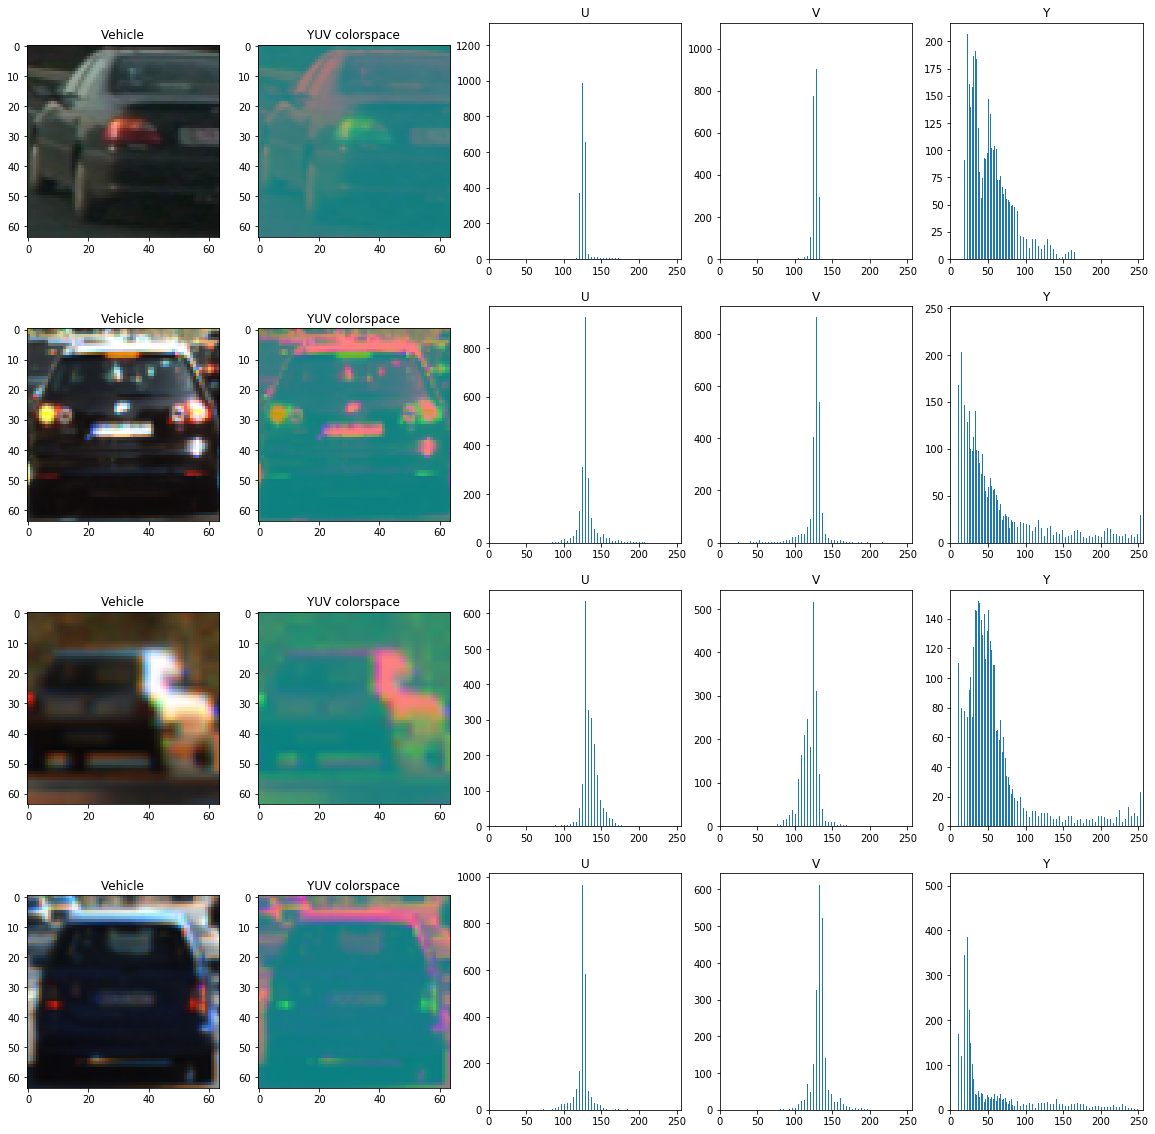

In [5]:
## Visualize the vehicle color features

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("HLS Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    # Trying the HLS colorspace
    img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2HLS)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("H")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("L")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("S")
    axes[i,1].imshow(img)
    axes[i,1].set_title("HLS colorspace")


f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("RGB Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    # Trying the RGB colorspace
    img = vehicle_images_arr[vehicle]
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("R")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("G")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("B")
    axes[i,1].imshow(img)
    axes[i,1].set_title("RGB colorspace")

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("YUV Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    # Trying the YUV colorspace
    img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2YUV)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("V")
    axes[i,1].imshow(img)
    axes[i,1].set_title("YUV colorspace")

HLS Colorspace
RGB Colorspace
YUV Colorspace
Number of features: 384
Number of features: 384
Number of features: 384
Number of features: 384


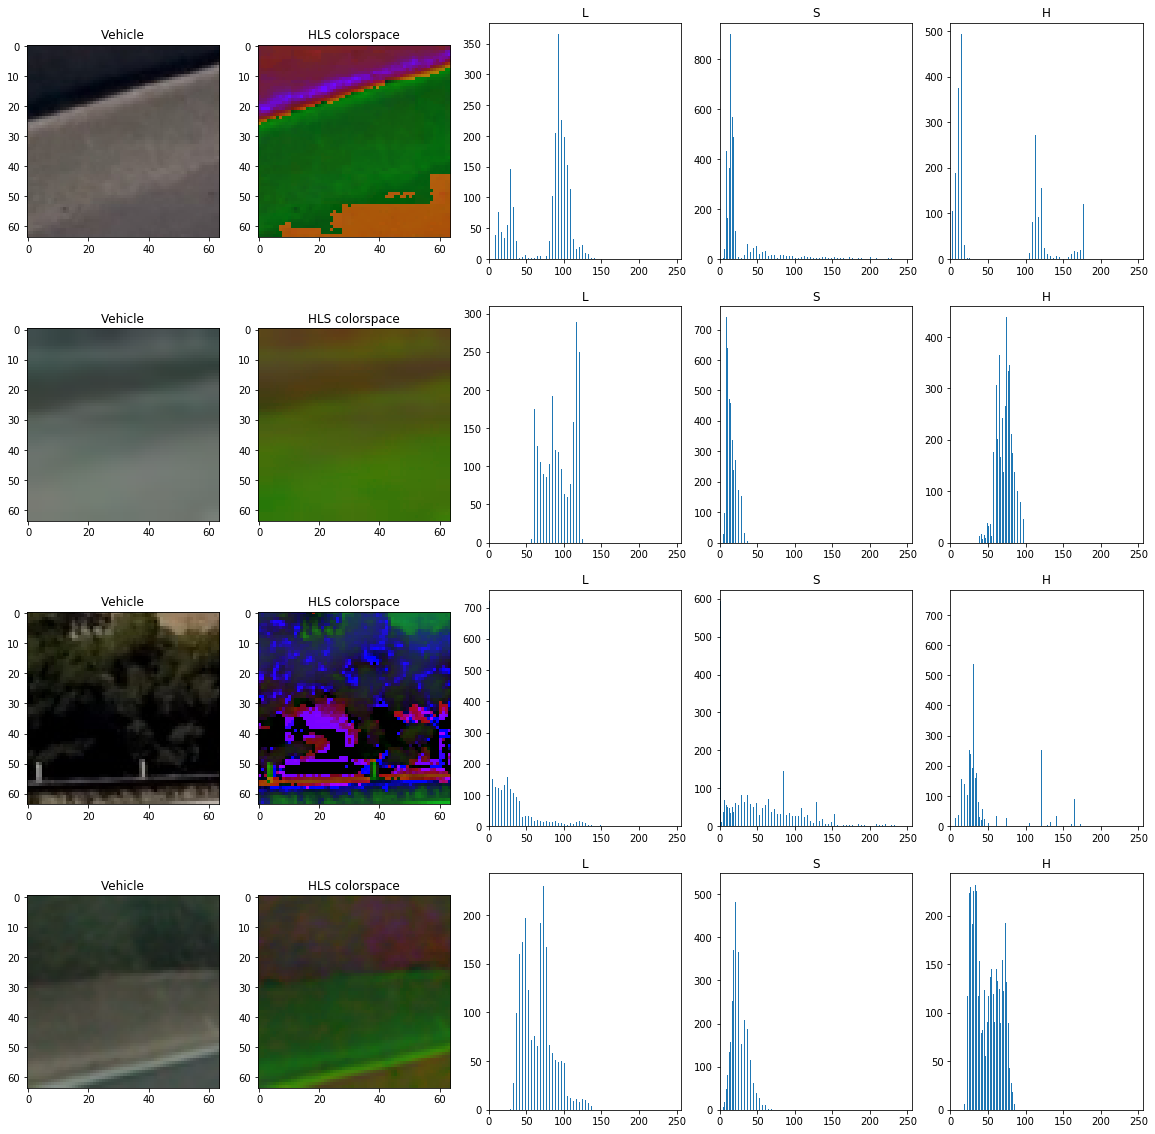

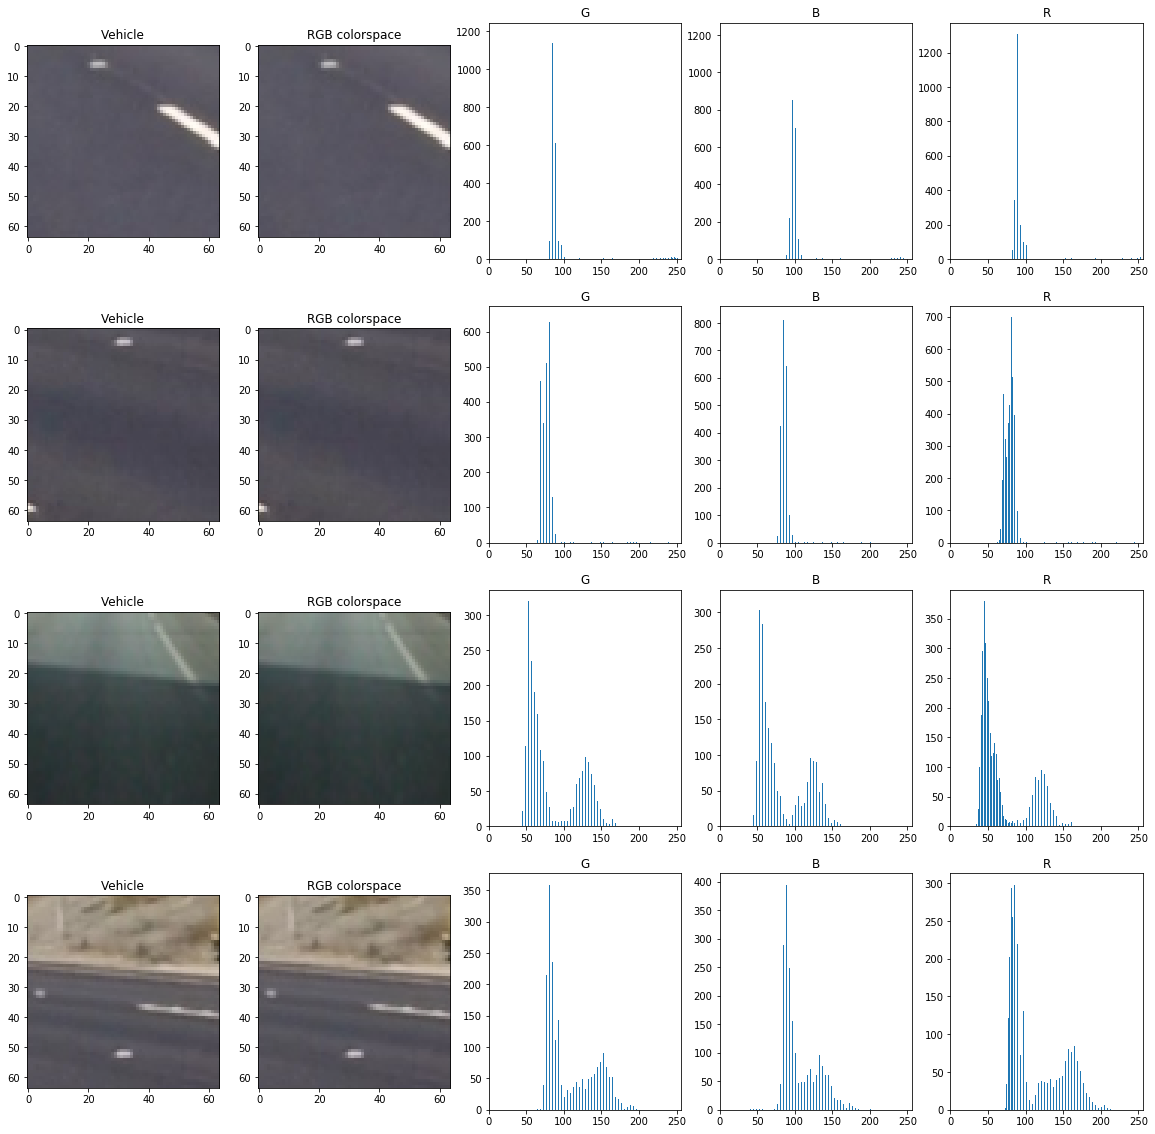

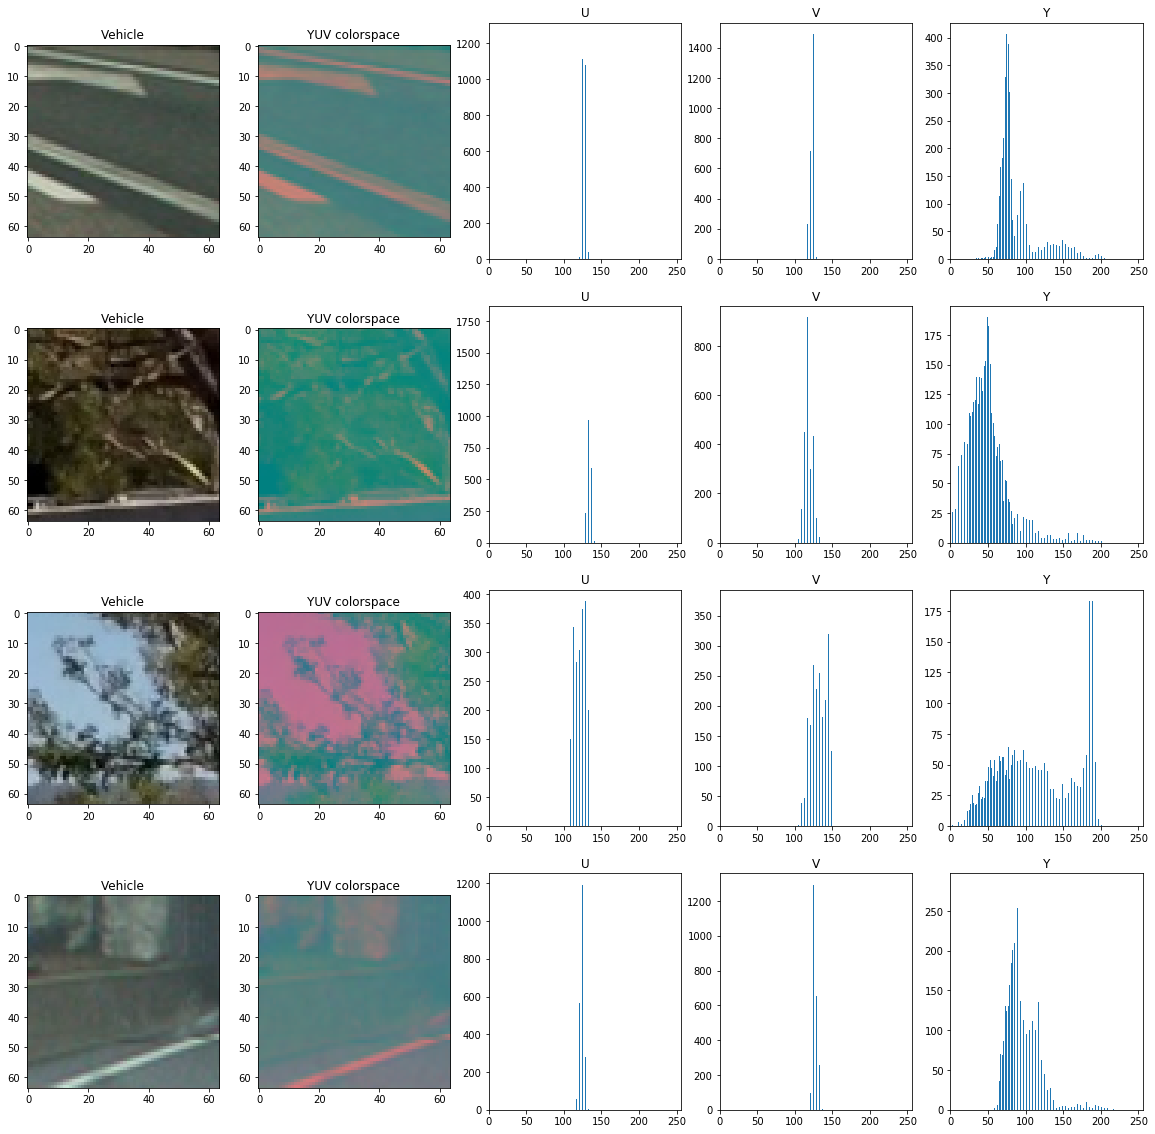

In [6]:
## Visualize the non-vehicles color features

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("HLS Colorspace")
for i in range(4):
    non_vehicle = random.randint(0, len(non_vehicle_images_arr) - 1)

    # Trying the HLS colorspace
    img = cv2.cvtColor(non_vehicle_images_arr[non_vehicle],cv2.COLOR_RGB2HLS)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(non_vehicle_images_arr[non_vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("H")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("L")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("S")
    axes[i,1].imshow(img)
    axes[i,1].set_title("HLS colorspace")


f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("RGB Colorspace")
for i in range(4):
    non_vehicle = random.randint(0, len(non_vehicle_images_arr) - 1)

    # Trying the RGB colorspace
    img = non_vehicle_images_arr[non_vehicle]
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(non_vehicle_images_arr[non_vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("R")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("G")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("B")
    axes[i,1].imshow(img)
    axes[i,1].set_title("RGB colorspace")

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("YUV Colorspace")
for i in range(4):
    non_vehicle = random.randint(0, len(non_vehicle_images_arr) - 1)

    # Trying the YUV colorspace
    img = cv2.cvtColor(non_vehicle_images_arr[non_vehicle],cv2.COLOR_RGB2YUV)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(non_vehicle_images_arr[non_vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("V")
    axes[i,1].imshow(img)
    axes[i,1].set_title("YUV colorspace")
    
    print("Number of features: " + str(len(hist_features)))

In [7]:
## Spatial Binning
def bin_spatial(img, color_space='YUV', size=(16, 16)):
    # Convert image to new color space (if specified)
    if color_space != 'YUV':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'RGB':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2RGB)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

## GET another image
vehicle = random.randint(0, len(vehicle_images_arr) - 1)
img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2YUV)

feature_list = bin_spatial(img)

print("Number of features after spatial binning: " + str(len(feature_list)))

Number of features after spatial binning: 768


In [8]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for image in imgs:
        file_features = []
        # Read in each one by one
        #image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

/Users/papiot/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


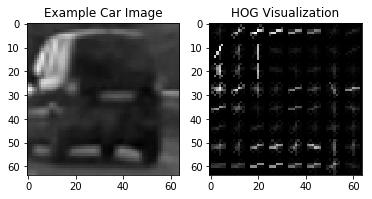

In [9]:
from skimage.feature import hog

# Let's test the HOG feature class 
img = vehicle_images_arr[25]
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(img, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')


In [48]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(vehicle_images_arr, cspace=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(non_vehicle_images_arr, cspace=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
19.81 Seconds to train SVC...
Test Accuracy of SVC =  0.9854


In [49]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

In [50]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

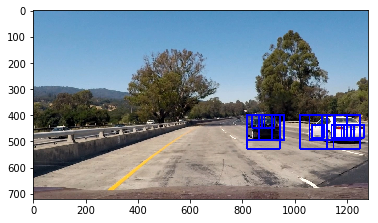

In [185]:
image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 650] # Min and max in y to search in slide_window()


#windows0 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                    xy_window=(48, 48), xy_overlap=(0.5, 0.5))

#windows1 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

windows0 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

windows1 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                     xy_window=(48, 48), xy_overlap=(0.2, 0.2))

windows2 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                     xy_window=(128, 128), xy_overlap=(0.2, 0.2))

#windows3 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                    xy_window=(256, 256), xy_overlap=(0.2, 0.2))


#windows3 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                    xy_window=(256, 256), xy_overlap=(0.5, 0.5))

#windows =  windows0 + windows1 + windows2 + windows3

windows = windows0 + windows1 + windows2
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

In [186]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

In [187]:
# applying a threshold value to the image to filter out low pixel cells

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [188]:
from scipy.ndimage.measurements import label
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

 Number of Cars found -  2


Text(0.5,1,'Final Image after applying Heat Map')

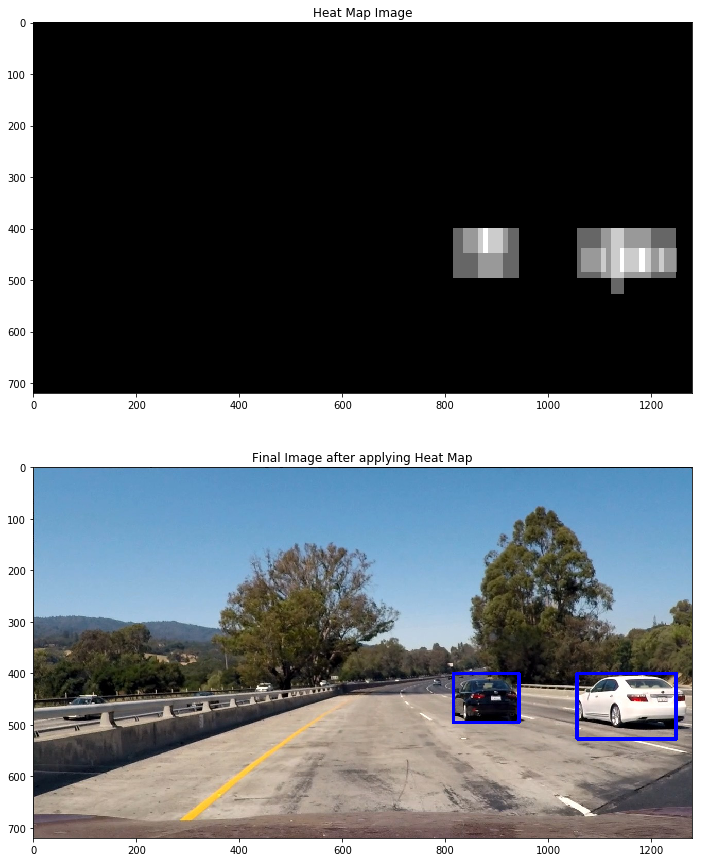

In [189]:
#testing our heat function

heat = np.zeros_like(image[:,:,0]).astype(np.float)

heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, 1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

heat_image=heatmap

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(" Number of Cars found - ",labels[1])
draw_img = draw_labeled_bboxes(np.copy(image), labels)

f,axes= plt.subplots(2,1, figsize=(30,15))
axes[0].imshow(heat_image,cmap='gray')
axes[0].set_title("Heat Map Image")
axes[1].imshow(draw_img)
axes[1].set_title("Final Image after applying Heat Map")

In [190]:
# Defining a class to store the refined frames found from the last 15 frames

class KeepTrack():
    def __init__(self):
        self.car_squares = [] 
        
    def AddWindows(self, car_squares):
        self.car_squares.append(car_squares)
        frameHistory=15
        if len(self.car_squares) > frameHistory:
            self.car_squares = self.car_squares[len(self.car_squares)-frameHistory:]


In [200]:
# Defining a pipeline for Video Frame Processing
# Note here the track of last 15 frames is kept

def Pipeline(image):

    rand= random.randint(0,1)
    if(rand<0.4):
        car_squares=keepTrack.car_squares[:-1]
    else:
        
        windows0 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

        windows1 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                             xy_window=(48, 48), xy_overlap=(0.2, 0.2))

        windows2 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                     xy_window=(128, 128), xy_overlap=(0.2, 0.2))

        windows = windows0 + windows1 + windows2

        car_squares = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)                       

        window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)  
        
                     
        if len(car_squares) > 0:
            keepTrack.AddWindows(car_squares)
    
            
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for refinedWindow in keepTrack.car_squares:
        heat = add_heat(heat, refinedWindow)
    
    
    
    heatmap = apply_threshold(heat, 1)
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

In [201]:
# Defining a different pipeline to process the images as we do not want to keep track of previous frames here

def PipelineImage(image):
    
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)           

#     refinedWindows=draw_windows(image,windows, True)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,hot_windows)
   
    heatmap = np.clip(heat, 0, 255)
    heatmap = apply_threshold(heat, 1)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img,heatmap

In [202]:
# Defining a different pipeline to process the images as we do not want to keep track of previous frames here

def PipelineMovie(image):
    
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)           


    return window_img

CPU times: user 20 s, sys: 202 ms, total: 20.2 s
Wall time: 20.6 s


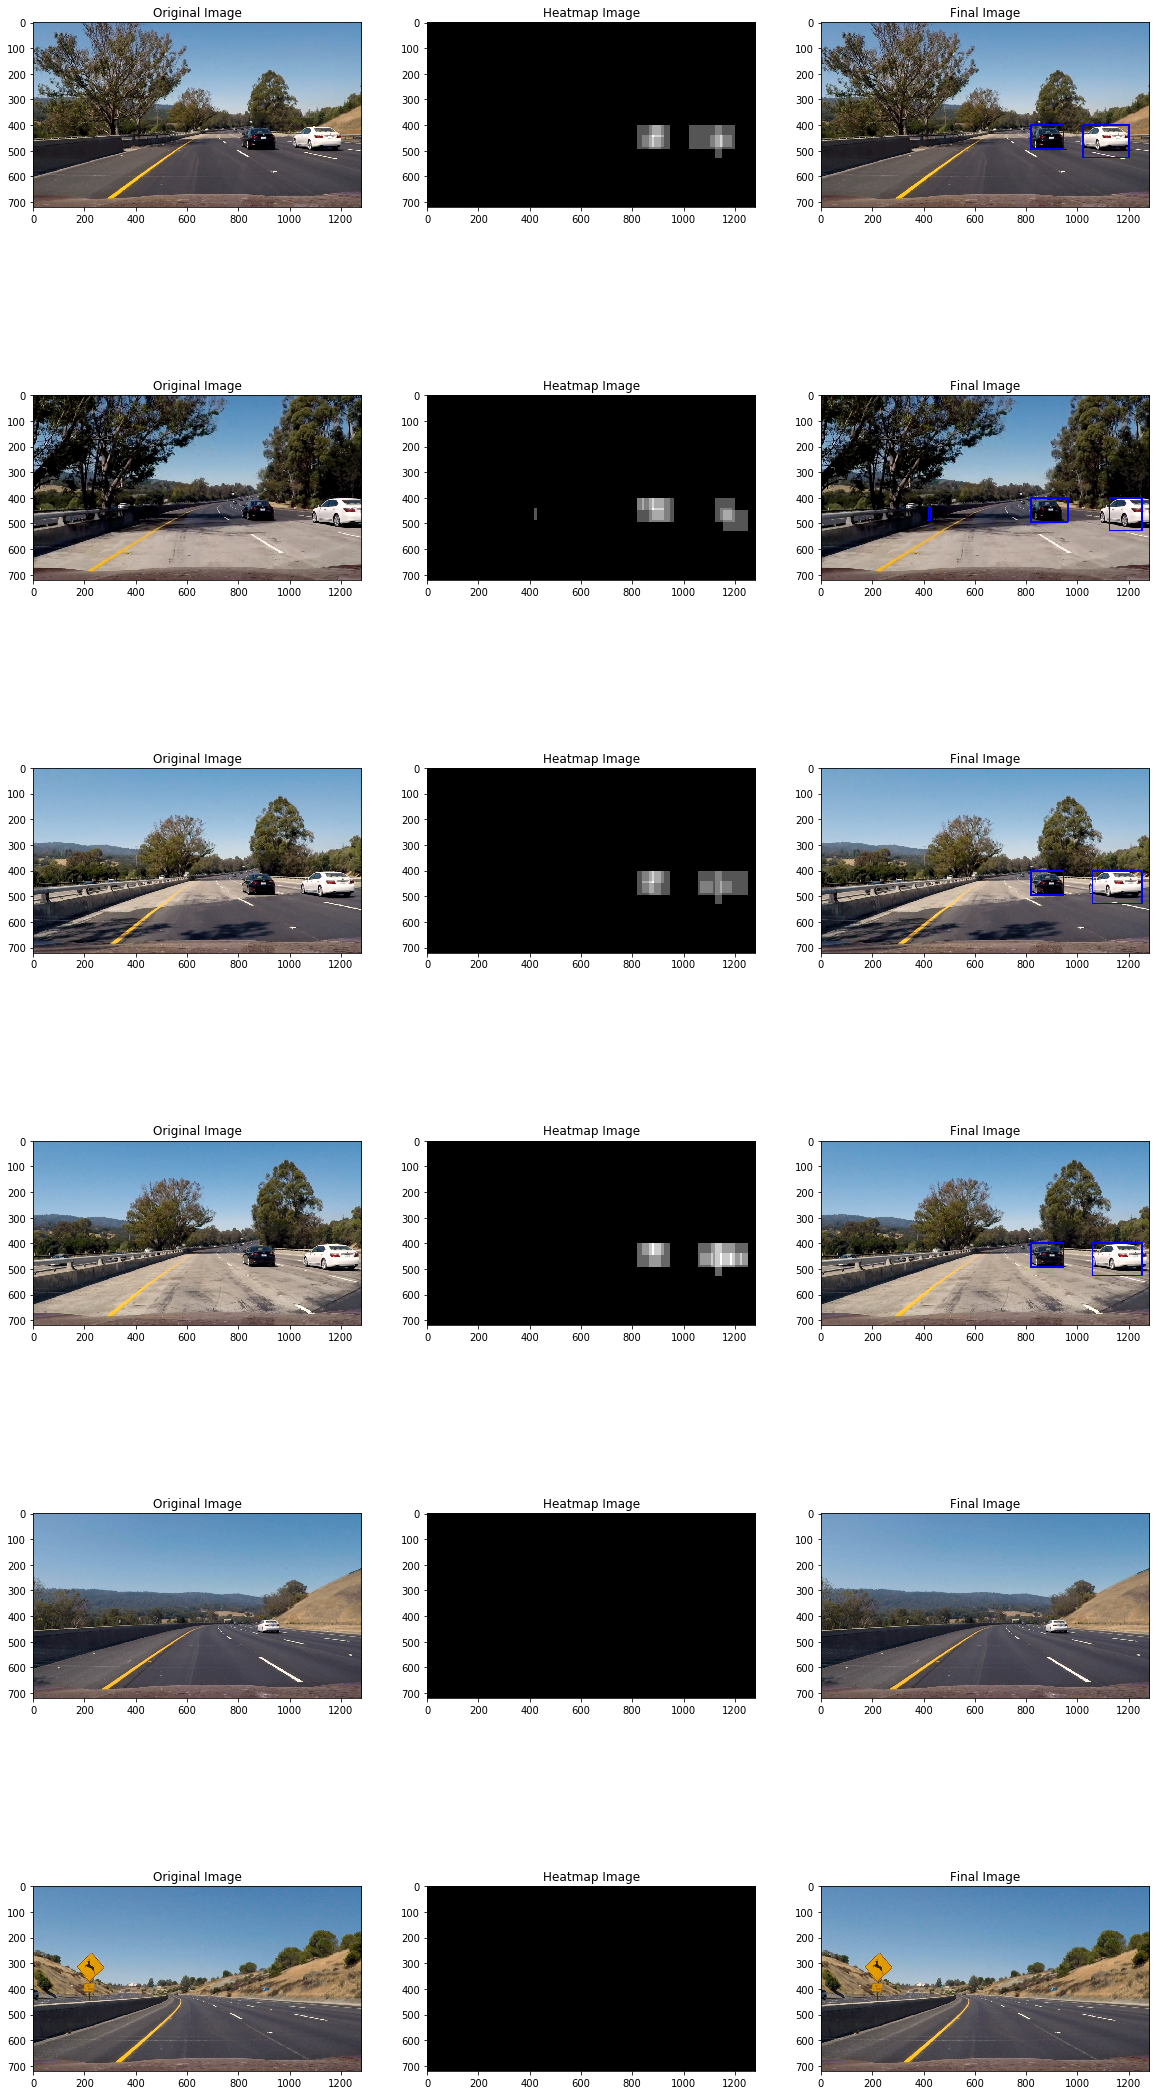

In [203]:
%%time
test_images= glob.glob("./test_images/*.jpg")
f, axes= plt.subplots(6,3, figsize=(20,40))

for index,image in enumerate(test_images):
    image = cv2.imread(image)
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    finalPic,heatmap = PipelineImage(image)
    axes[index,0].imshow(image)
    axes[index,0].set_title("Original Image")
    axes[index,1].imshow(heatmap,cmap='gray')
    axes[index,1].set_title("Heatmap Image")
    axes[index,2].imshow(finalPic)
    axes[index,2].set_title("Final Image")

In [ ]:
keepTrack = KeepTrack()
import moviepy
from moviepy.editor import VideoFileClip
white_output = 'output_video_part.mp4'

clip1 = VideoFileClip("project_video.mp4").subclip(4,11)
#clip1 = VideoFileClip("project_video.mp4")

white_clip = clip1.fl_image(Pipeline) #NOTE: this function expects color images!!

%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output_video_part.mp4
[MoviePy] Writing video output_video_part.mp4



 86%|████████▋ | 152/176 [04:37<00:54,  2.25s/it]